In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

In [100]:
init_notebook_mode(connected=True)

In [102]:
cf.go_offline()

In [105]:
df = pd.read_csv('agri1.1.csv', index_col = 0)

In [106]:
df.head()

,Area,PH,Season,Crop,Yield Goal,N,P,K,Cow_Dung,Poultry_Manure
0,Thakurgra,3.8-5.5,Rabi,Boro Rice,7.5,150,65,65,0,0.0
1,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0.0
2,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0.0
3,Thakurgra,3.8-5.5,Rabi,Potato,30.0,135,30,90,5,3.0
4,Thakurgra,3.8-5.5,Rabi,Marize,10.0,255,75,80,0,0.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 10 columns):
Area              706 non-null object
PH                706 non-null object
Season            706 non-null object
Crop              706 non-null object
Yield Goal        706 non-null float64
N                 706 non-null int64
P                 706 non-null int64
K                 706 non-null int64
Cow_Dung          706 non-null int64
Poultry_Manure    697 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 60.7+ KB


In [108]:
df['Cow_Dung'] = df['Cow_Dung'].replace(5, 1)

In [109]:
df['Poultry_Manure'] = df['Poultry_Manure'].replace(3.0, 1.0)

In [110]:
# check any val in col is null or not
# -----------------------------------

df['Poultry_Manure'].isnull().values.any()

True

In [111]:
df['Poultry_Manure'].value_counts()

0.0    554
1.0    143
Name: Poultry_Manure, dtype: int64

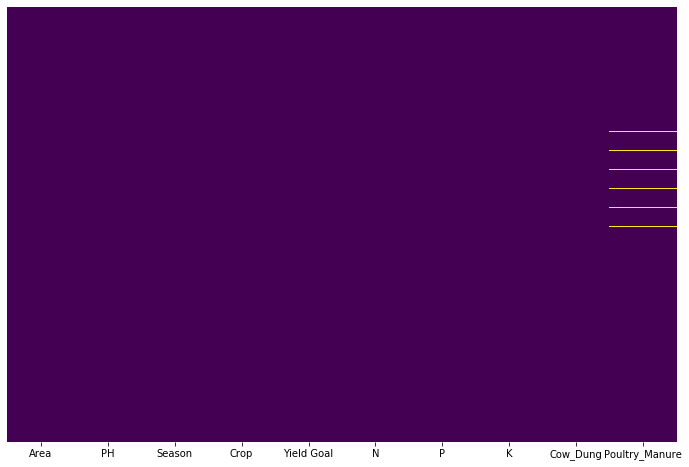

In [112]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [113]:
df['Poultry_Manure'] = df['Poultry_Manure'].fillna(0.0)

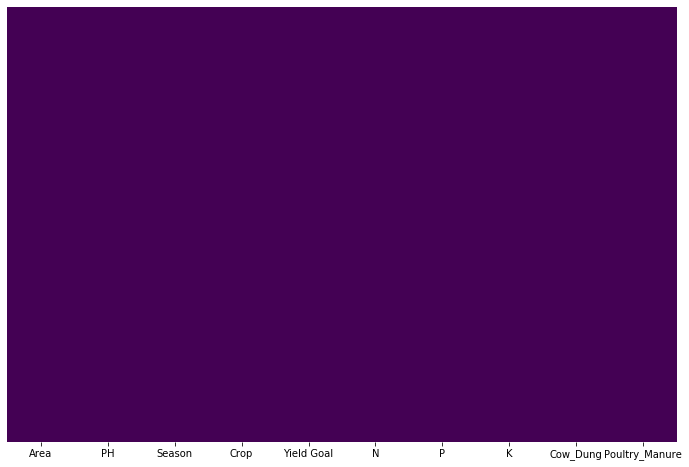

In [114]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [115]:
df['Poultry_Manure'].isnull().values.any()

False

In [116]:
df.head()

,Area,PH,Season,Crop,Yield Goal,N,P,K,Cow_Dung,Poultry_Manure
0,Thakurgra,3.8-5.5,Rabi,Boro Rice,7.5,150,65,65,0,0.0
1,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0.0
2,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0.0
3,Thakurgra,3.8-5.5,Rabi,Potato,30.0,135,30,90,1,1.0
4,Thakurgra,3.8-5.5,Rabi,Marize,10.0,255,75,80,0,0.0


In [117]:
# convert float to int
# ---------------------

df['Poultry_Manure'] = df['Poultry_Manure'].astype('int')

In [118]:
df.head()

,Area,PH,Season,Crop,Yield Goal,N,P,K,Cow_Dung,Poultry_Manure
0,Thakurgra,3.8-5.5,Rabi,Boro Rice,7.5,150,65,65,0,0
1,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0
2,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0
3,Thakurgra,3.8-5.5,Rabi,Potato,30.0,135,30,90,1,1
4,Thakurgra,3.8-5.5,Rabi,Marize,10.0,255,75,80,0,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 10 columns):
Area              706 non-null object
PH                706 non-null object
Season            706 non-null object
Crop              706 non-null object
Yield Goal        706 non-null float64
N                 706 non-null int64
P                 706 non-null int64
K                 706 non-null int64
Cow_Dung          706 non-null int64
Poultry_Manure    706 non-null int32
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 57.9+ KB


In [148]:
df.iplot(kind='scatter', x='N', y='P', mode='markers', theme='solar', xTitle='Nitrogen', yTitle='P')

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df['Area'] = le.fit_transform(df['Area'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])

In [20]:
df.head()

,Area,PH,Season,Crop,Yield Goal,N,P,K,Cow_Dung,Poultry_Manure
0,14,3.8-5.5,3,1,7.5,150,65,65,0,0
1,14,3.8-5.5,3,21,4.5,120,30,60,0,0
2,14,3.8-5.5,3,21,4.5,120,30,60,0,0
3,14,3.8-5.5,3,14,30.0,135,30,90,1,1
4,14,3.8-5.5,3,9,10.0,255,75,80,0,0


In [21]:
phVal = df['PH'].values

In [22]:
def average(index1, index2):
    return ((index1 + index2) / 2)

In [23]:
phModified = []

In [24]:
for i in phVal:
    inSplit = i.split('-')
    index1 = float(inSplit[0])
    index2 = float(inSplit[1])
    averageValue = average(index1, index2)
    phModified.append(averageValue)

In [25]:
df['PH'] = phModified

In [26]:
df.head(10)

,Area,PH,Season,Crop,Yield Goal,N,P,K,Cow_Dung,Poultry_Manure
0,14,4.65,3,1,7.5,150,65,65,0,0
1,14,4.65,3,21,4.5,120,30,60,0,0
2,14,4.65,3,21,4.5,120,30,60,0,0
3,14,4.65,3,14,30.0,135,30,90,1,1
4,14,4.65,3,9,10.0,255,75,80,0,0
5,14,4.65,3,15,60.0,150,45,80,1,1
6,14,4.65,3,3,90.0,180,66,50,1,1
7,14,4.65,3,4,30.0,120,60,76,1,1
8,14,4.65,1,6,0.0,0,0,0,0,0
9,14,4.65,1,6,0.0,0,0,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 10 columns):
Area              706 non-null int32
PH                706 non-null float64
Season            706 non-null int32
Crop              706 non-null int32
Yield Goal        706 non-null float64
N                 706 non-null int64
P                 706 non-null int64
K                 706 non-null int64
Cow_Dung          706 non-null int64
Poultry_Manure    706 non-null int32
dtypes: float64(2), int32(4), int64(4)
memory usage: 49.6 KB


In [79]:
df['Season'].value_counts()

3    287
1    191
2    180
4     39
0      9
Name: Season, dtype: int64

In [91]:
df['Area'].value_counts()

0     72
13    62
7     61
12    55
11    55
9     55
6     55
5     55
3     55
2     55
10    41
4     31
14    24
8     21
1      9
Name: Area, dtype: int64

In [92]:
df['Crop'].value_counts()

17    142
6     111
14     58
8      51
1      50
21     49
18     42
9      34
16     26
15     24
3      24
4      24
10     19
13     13
2      11
0       9
11      7
12      4
7       3
5       3
20      1
19      1
Name: Crop, dtype: int64

In [29]:
X = df.iloc[:, 0:8].values
y_Cow_Dung = df.iloc[:, -2].values
y_Poultry_Manure = df.iloc[:, -1].values

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y_Cow_Dung, test_size = 0.2, random_state = 0)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y_Poultry_Manure, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

In [33]:
x_train = sc.fit_transform(x_train)
x_train1 = sc.fit_transform(x_train1)

x_test = sc.transform(x_test)
x_test1 = sc.transform(x_test1)

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC()
svc1 = SVC()

In [36]:
svc.fit(x_train, y_train)
svc1.fit(x_train1, y_train1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
svc_pred = svc.predict(x_test)
svc_pred1 = svc1.predict(x_test1)

In [38]:
print('accuracy: ',round(accuracy_score(y_test, svc_pred) * 100, 3), '%')
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

print('accuracy: ',round(accuracy_score(y_test1, svc_pred1) * 100, 3),'%')
print(confusion_matrix(y_test1, svc_pred1))
print(classification_report(y_test1, svc_pred1))

accuracy:  99.296 %
[[107   0]
 [  1  34]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.97      0.99        35

    accuracy                           0.99       142
   macro avg       1.00      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142

accuracy:  97.887 %
[[109   0]
 [  3  30]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       109
           1       1.00      0.91      0.95        33

    accuracy                           0.98       142
   macro avg       0.99      0.95      0.97       142
weighted avg       0.98      0.98      0.98       142



In [39]:
result = pd.DataFrame({
    'actual(cow_dung)': y_test,
    'machine predict(cow_dung)' : svc_pred,
    'actual(Poultry_Manure)': y_test1,
    'machine predict(Poultry_Manure)' : svc_pred1
})

In [40]:
result.head(20)

,actual(cow_dung),machine predict(cow_dung),actual(Poultry_Manure),machine predict(Poultry_Manure)
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0
5,0,0,0,0
6,1,1,1,1
7,0,0,0,0
8,0,0,0,0
9,1,1,1,1


In [96]:
result = go.Sunburst(
    labels=['attributes', 'decision class', 'input feature', 'cow dung accuracy', 'poultry manure accuracy', 'area', 'season', 'crop'],
    parents=['Dataset', 'Dataset', 'Dataset', 'decision class', 'decision class', 'attributes', 'attributes', 'attributes'],
    values=[10, 2, 8, 99.296, 97.787, 15, 5, 22],
    outsidetextfont = {"size": 20, "color": "red"},
    marker = {"line": {"width": 2}},
)

In [97]:
layout = go.Layout(
    margin = go.layout.Margin(t=0, l=0, r=0, b=0)
)

In [98]:
iplot(go.Figure([result], layout))